<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 5px; padding: 20px">
Описание данных
    
<br>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
<br>balcony — число балконов
<br>ceiling_height — высота потолков (м)
<br>cityCenters_nearest — расстояние до центра города (м)
<br>days_exposition — сколько дней было размещено объявление (от публикации до снятия)
<br>first_day_exposition — дата публикации
<br>floor — этаж
<br>floors_total — всего этажей в доме
<br>is_apartment — апартаменты (булев тип)
<br>kitchen_area — площадь кухни в квадратных метрах (м²)
<br>last_price — цена на момент снятия с публикации
<br>living_area — жилая площадь в квадратных метрах (м²)
<br>locality_name — название населённого пункта
<br>open_plan — свободная планировка (булев тип)
<br>parks_around3000 — число парков в радиусе 3 км
<br>parks_nearest — расстояние до ближайшего парка (м)
<br>ponds_around3000 — число водоёмов в радиусе 3 км
<br>ponds_nearest — расстояние до ближайшего водоёма (м)
<br>rooms — число комнат
<br>studio — квартира-студия (булев тип)
<br>total_area — площадь квартиры в квадратных метрах (м²)
<br>total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# Прочитаем таблицу и выведем первые 10 строк на экран
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
pd.set_option('display.max_columns', None) #выведем все столбцы таблицы на экран
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div style="border:solid green 5px; padding: 20px">
<br>1. Неудобно читать таблицу, нужно поменять порядок стобцов для удобства.
<br>2. Возможно убрать столбцы, которые в дальнейшей работе не понадобятся
<br>3. airports_nearest перевести растояние до аэропорта в км. 
<br>4. cityCenters_nearest перевести растояние до торгового центра в км. Переименовать столбец в city_centers_nearest.

In [3]:
data.info() #просмотрим общую информацию по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

<div style="border:solid green 5px; padding: 20px">
<br>1. last_price - нужно заменить вещественный тип данных на 'float64'.
<br>2. total_area - нужно заменить вещественный тип данных на 'float64'.
<br>3. first_day_exposition  - нужно перевесьти в формат даты.
<br>4. ceiling_height - нужно заменить вещественный тип данных на 'float64'. 
<br>5. floors_total - нужно заменить вещественный тип данных на 'float64'.
<br>6. living_area - нужно заменить вещественный тип данных на 'float64'.
<br>7. is_apartment - нужно привести все значения к типу bool (в дальнейшей работе данные не пригодятся).
<br>8. kitchen_area - нужно заменить вещественный тип данных на 'float64'. 
<br>9. balcony - нужно заменить вещественный тип данных на 'float64'. 
<br>10. airports_nearest  - нужно заменить вещественный тип данных на 'float64'. 
<br>11. cityCenters_nearest  - нужно заменить вещественный тип данных на 'float64'. 
<br>12. parks_around3000  - нужно заменить вещественный тип данных на 'float64'.
<br>13. parks_nearest  - нужно заменить вещественный тип данных на 'float64'.
<br>14. ponds_around3000  - нужно заменить вещественный тип данных на 'float64'.
<br>15. ponds_nearest  - нужно заменить вещественный тип данных на 'float64'.
<br>16. days_exposition  - нужно заменить вещественный тип данных на 'float64'.

In [4]:
data.isna().mean() # узнаем долю пропусков в таблице

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

<div style="border:solid green 5px; padding: 20px">
<br>1. ceiling_height  - 39% пропусков, можно заменить на медиану. Таким образом выбросы окажут наименьшее влияние.
<br>2. floors_total - менее 1% пропусков. Оставим пропуски, в дальнейшем анализе не понадобится.
<br>3. living_area - 8% пропусков. Заменим пропуски медианным значением, для дальнейшего анализа эти данные не потребуются.
<br>4. is_apartment - 88% пропусков. Поскольку этот столбец должен быть с булевым типом данных заменим все пропуски False. В дальнейших расчетах он не пригодится.
<br>5. kitchen_area - 9% пропусков. Заменим пропуски медианным значением, для дальнейшего анализа эти данные не потребуются.
<br>6. balcony - 48% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
<br>7. locality_name - 0,2% пропусков. Эти пропуски лучше убрать, на результат они вряд ли повлияют.
<br>8. airports_nearest - 23% пропусков. Оставим значения NaN на своих местах, чтобы они не влияли на расчетах. Если заменим на 0 -  квартира у нас будет в аэропорту. А если поставить макс значение из таблицы, данные могут быть искажены.
<br>9. cityCenters_nearest  - 23% пропусков. Оставим значения NaN на своих местах, чтобы они не влияли на расчетах. Если заменим на 0 -  квартира у нас будет в центре города. А если поставить макс значение из таблицы, данные могут быть искажены.
<br>10. parks_around3000  - 23% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
<br>11. parks_nearest   - 65% пропусков. Заполнил медианным значением если parks_around3000>0. В ином случае, отсавим NaN.    
<br>12. ponds_around3000  - 23% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
<br>13. ponds_nearest - 61% пропусков. Заполнил медианным значением если ponds_around3000>0. В ином случае, отсавим NaN.
<br>14. days_exposition - 13% пропусков. Заменим пропуски медианным значением

### Вывод

<div style="border:solid green 5px; padding: 20px">
Критических замечаний нет. Для анализа нужно привести таблицу к удобному виду. Для большей части пропусков нет подходящего значения на замену (например: расстояния до эропорта, торгового центра, парка, пруда), эти значения оставим пустыми, чтобы не искажали результаты исследования. Еще нужно убрать столбцы которые не потребуются для расчетов.

## Предобработка данных

airports_nearest - нужно заменить вещественный тип данных на float64 и переведем в км.
cityCenters_nearest нужно заменить вещественный тип данных на float64 и переведем в км. Переименуем столбец в city_centers_nearest.

In [5]:
#airports_nearest 
data['airports_nearest']=data['airports_nearest'].astype('float64')/1000
#cityCenters_nearest 
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True) 
data['city_centers_nearest']=data['city_centers_nearest'].astype('float64')/1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18.863,16.028,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12.817,18.603,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21.741,13.933,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28.098,6.800,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31.856,8.098,2.0,112.0,1.0,48.0,121.0


In [6]:
#last_price - нужно заменить вещественный тип данных на 'float64'.
data['last_price']=data['last_price'].astype('float64')
#total_area - нужно заменить вещественный тип данных на 'float16'.
data['total_area']=data['total_area'].astype('float64')
#first_day_exposition - нужно перевесьти в формат даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#ceiling_height - нужно заменить вещественный тип данных на 'float16'.
data['ceiling_height']=data['ceiling_height'].astype('float64')
#floors_total - нужно заменить вещественный тип данных на 'float16'.
data['floors_total']=data['floors_total'].astype('float64')
#living_area - нужно заменить вещественный тип данных на 'float16'.
data['living_area']=data['living_area'].astype('float64')
#is_apartment - нужно привести все значения к типу bool заменим пропуски на False (в дальнейшей работе данные не пригодятся).
data['is_apartment']=data['is_apartment'].fillna('False').astype('bool')
#kitchen_area - нужно заменить вещественный тип данных на 'float16'.
data['kitchen_area']=data['kitchen_area'].astype('float64')
#balcony - нужно заменить вещественный тип данных на 'float16'.
data['balcony']=data['balcony'].astype('float64')
#parks_around3000 - нужно заменить вещественный тип данных на 'float16'.
data['parks_around3000']=data['parks_around3000'].astype('float64')
#parks_nearest - нужно заменить вещественный тип данных на 'float16'.
data['parks_nearest']=data['parks_nearest'].astype('float64')
#ponds_around3000 - нужно заменить вещественный тип данных на 'float16'.
data['ponds_around3000']=data['ponds_around3000'].astype('float64')
#ponds_nearest - нужно заменить вещественный тип данных на 'float16'.
data['ponds_nearest']=data['ponds_nearest'].astype('float64')
#days_exposition - нужно заменить вещественный тип данных на 'float16'.
data['days_exposition']=data['days_exposition'].astype('float64')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

In [7]:
#last_price - нужно заменить вещественный тип данных на 'float64'.
data['last_price']=data['last_price'].astype('float64')
#total_area - нужно заменить вещественный тип данных на 'float16'.
data['total_area']=data['total_area'].astype('float16')
#first_day_exposition - нужно перевесьти в формат даты.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#ceiling_height - нужно заменить вещественный тип данных на 'float16'.
data['ceiling_height']=data['ceiling_height'].astype('float16')
#floors_total - нужно заменить вещественный тип данных на 'float16'.
data['floors_total']=data['floors_total'].astype('float16')
#living_area - нужно заменить вещественный тип данных на 'float16'.
data['living_area']=data['living_area'].astype('float16')
#is_apartment - нужно привести все значения к типу bool заменим пропуски на False (в дальнейшей работе данные не пригодятся).
data['is_apartment']=data['is_apartment'].fillna('False').astype('bool')
#kitchen_area - нужно заменить вещественный тип данных на 'float16'.
data['kitchen_area']=data['kitchen_area'].astype('float16')
#balcony - нужно заменить вещественный тип данных на 'float16'.
data['balcony']=data['balcony'].astype('float16')
#parks_around3000 - нужно заменить вещественный тип данных на 'float16'.
data['parks_around3000']=data['parks_around3000'].astype('float16')
#parks_nearest - нужно заменить вещественный тип данных на 'float16'.
data['parks_nearest']=data['parks_nearest'].astype('float16')
#ponds_around3000 - нужно заменить вещественный тип данных на 'float16'.
data['ponds_around3000']=data['ponds_around3000'].astype('float16')
#ponds_nearest - нужно заменить вещественный тип данных на 'float16'.
data['ponds_nearest']=data['ponds_nearest'].astype('float16')
#days_exposition - нужно заменить вещественный тип данных на 'float16'.
data['days_exposition']=data['days_exposition'].astype('float16')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float16
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float16
floors_total            23613 non-null float16
living_area             21796 non-null float16
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float16
balcony                 12180 non-null float16
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float16
parks_nearest           8079 non-null float16
ponds_ar

In [8]:
#living_area - 8% пропусков. 
#Заменим пропуски медианным значением, для дальнейшего анализа эти данные не потребуются.
data['living_area']=data['living_area'].fillna(data['living_area'].median())
#Для начала нужно определить медианные значения для студий и квартир, и заполнить ими пропуски
flat_median = data.loc[(data['studio']==False), 'living_area'].median() # Узнали медиану для квартир
studio_median = data.loc[(data['studio']==True), 'living_area'].median() # Узнали медиану для студий
flat_median,studio_median

(30.0, 18.0)

In [9]:
#Заполним пропуски living_area соответсвующими медианными значениями

ind_nan_liv1 = data.loc[(data['living_area'].isna() == True) & (data['studio']==False)].index 
# Индексы где пропуски в значениях 'living_area' и ['studio']==False)
data.loc[ind_nan_liv1, 'living_area'] = flat_median
ind_nan_liv2 = data.loc[(data['living_area'].isna() == True) & (data['studio']==True)].index 
# Индексы где пропуски в значениях 'living_area' и ['studio']==True
data.loc[ind_nan_liv2, 'living_area'] = studio_median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float16
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float16
floors_total            23613 non-null float16
living_area             23699 non-null float16
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float16
balcony                 12180 non-null float16
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around3000        18181 non-null float16
parks_nearest           8079 non-null float16
ponds_ar

In [10]:
#kitchen_area - 9% пропусков. 
#Найдем медианное значение для площади кухни
kit_median = data.loc[(data['studio']==False), 'kitchen_area'].median() # Узнали медиану для квартир
kit_count= data.loc[(data['studio']==True), 'kitchen_area'].count() # количество студий с кухнями 
#(по хорошему их быть не должно, потому что в студиях площадь кухни не считается)
kit_median, kit_count 

(9.1, 0)

<div style="border:solid green 5px; padding: 20px">
    Действительно, студий где выделена отдельно площадь кухни нет. Поэтому заменим площадь кухни в квартирах на медиану, а в студиях на 0.

In [11]:
#Заполним пропуски kitchen_area в квартирах соответсвующими медианным значением (9.1)
data[(data['kitchen_area'].isna() == True) & (data['studio']==False)]=data[(data['kitchen_area'].isna() == True) & (data['studio']==False)].fillna(kit_median)
#Заполним пропуски kitchen_area в студиях соответсвующим значением (0)
data[(data['kitchen_area'].isna() == True) & (data['studio']==True)]=data[(data['kitchen_area'].isna() == True) & (data['studio']==True)].fillna(kit_count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float16
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          15842 non-null float16
floors_total            23660 non-null float16
living_area             23699 non-null float16
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float16
balcony                 13729 non-null float16
locality_name           23659 non-null object
airports_nearest        18874 non-null float64
city_centers_nearest    18895 non-null float64
parks_around3000        18896 non-null float16
parks_nearest           9667 non-null float16
ponds_ar

In [58]:
#Все значения где 'total_area' меньше чем сумма 'living_area' и 'kitchen_area'
#Заменим на разность 'total_area' и 'living_area'
data['dif']=data['total_area'] - (data['living_area']+data['kitchen_area'])
data.loc[(data['dif']<0), 'kitchen_area'] = data['total_area'] - data['living_area']
data['dif'].describe()

count    23658.00000
mean             inf
std              inf
min          0.00000
25%          9.00000
50%         12.59375
75%         18.00000
max        541.00000
Name: dif, dtype: float64

In [13]:
#ceiling_height  - 39% пропусков, можно заменить на среднее по значениям. 
#Высота потолков во всех квартирах практически одинаковая.
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
#balcony - 48% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
data['balcony']=data['balcony'].fillna(0)
#locality_name - 0,2% пропусков. Эти пропуски лучше убрать, на результат они вряд ли повлияют.
data = data.dropna(subset=['locality_name']) 
#parks_around3000  - 23% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
data['parks_around3000']=data['parks_around3000'].fillna(0)
#ponds_around3000  - 23% пропусков. Поскольку нет данных, поставим на местах пропусков 0.
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
#days_exposition - 13% пропусков. Заменим медианным значением.
#data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23659 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23659 non-null int64
last_price              23659 non-null float64
total_area              23659 non-null float16
first_day_exposition    23659 non-null datetime64[ns]
rooms                   23659 non-null int64
ceiling_height          23659 non-null float16
floors_total            23621 non-null float16
living_area             23659 non-null float16
floor                   23659 non-null int64
is_apartment            23659 non-null bool
studio                  23659 non-null bool
open_plan               23659 non-null bool
kitchen_area            23659 non-null float16
balcony                 23659 non-null float16
locality_name           23659 non-null object
airports_nearest        18840 non-null float64
city_centers_nearest    18861 non-null float64
parks_around3000        23659 non-null float16
parks_nearest           9653 non-null float16
ponds_ar

In [14]:
#parks_nearest   - 65% пропусков. Заполнил медианным значением если parks_around3000>0. В ином случае, отсавим NaN.    
data[(data['parks_nearest'].isna()) & (data['parks_around3000'] > 0)].head(20)
# таких строк нет, замена не требуется

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,dif


In [15]:
#ponds_nearest - 61% пропусков. Заполнил медианным значением если ponds_around3000>0. В ином случае, отсавим NaN.
data[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] > 0)].head(20)
# таких строк нет, замена не требуется

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,dif


In [16]:
# Посмотрим количество дубликатов и при необходимости удалим их.
data.duplicated().sum()
#Дубликатов нет.

0

<div style="border:solid green 5px; padding: 20px">
Подготовили таблицу для дальнейших вычислений и анализа. В результате предобработки удалили 49 строк. ceiling_height заполнили средним значением. kitchen_area, living_area, days_exposition заполнили медианным значением. Пропуски в ponds_nearest, parks_nearest, city_centers_nearest, airports_nearest заполнять не стали, поскольку заполнение их значениями может исказить результаты, а в данном случае они учитываться не будут. floors_total - отсутствует 85 значений о этажности дома (для анализа, эти данные не требуются).

## Расчёты и добавление результатов в таблицу

In [17]:
#Добавим цена за квадртаный метр price_m2 (поделим сумму продажи на общую площадь)
data['price_m2']=(data['last_price']/data['total_area']).astype(int)
data.sort_values(by = 'price_m2')
# Сразу обратим внимание на максимальную и минимальную цену за квадратный метр. 
#Максимальное значение похоже на правду( огромная квартира в центре крупного города вполне может столько стоить). 
#Минимальное значение уже вызывает сомнения (не может быть цена за квадратный метр - 111 рублей), его мы исключим из расчетов.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,dif,price_m2
8793,7,12190.0,109.00000,2019-03-20,2,2.750000,25.0,32.000000,25,True,False,False,40.500000,0.000000,Санкт-Петербург,36.421000,9.176000,1.000000,805.000000,0.000000,NaN,8.0,36.50000,111
14911,5,430000.0,54.00000,2018-06-26,2,9.101562,3.0,30.000000,3,True,False,False,9.101562,9.101562,посёлок станции Свирь,9.101562,9.101562,9.101562,9.101562,9.101562,9.101562,44.0,14.90625,7962
4405,9,500000.0,52.00000,2018-08-02,2,2.699219,2.0,31.000000,1,True,False,False,8.000000,0.000000,Сланцы,NaN,NaN,0.000000,NaN,0.000000,NaN,110.0,13.00000,9615
11351,17,550000.0,54.00000,2019-02-07,2,3.000000,2.0,40.000000,1,True,False,False,7.500000,0.000000,Сланцы,NaN,NaN,0.000000,NaN,0.000000,NaN,78.0,6.50000,10185
9581,7,450000.0,43.40625,2018-08-31,2,2.699219,5.0,30.296875,3,True,False,False,5.500000,0.000000,деревня Старополье,NaN,NaN,0.000000,NaN,0.000000,NaN,96.0,7.59375,10367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,20,124000000.0,124.50000,2017-10-12,4,3.000000,4.0,67.187500,2,False,False,False,20.000000,0.000000,Санкт-Петербург,20.399000,1.722000,3.000000,302.000000,3.000000,172.000000,45.0,37.31250,995983
14706,15,401300000.0,401.00000,2016-02-20,5,2.699219,9.0,204.000000,9,False,False,False,24.000000,3.000000,Санкт-Петербург,21.912000,2.389000,1.000000,545.000000,1.000000,478.000000,393.0,173.00000,1000748
22831,18,289238400.0,187.50000,2019-03-19,2,3.369141,6.0,63.687500,6,True,False,False,30.203125,0.000000,Санкт-Петербург,22.494000,1.073000,3.000000,386.000000,3.000000,188.000000,NaN,93.62500,1542604
1436,19,330000000.0,190.00000,2018-04-04,3,3.500000,7.0,95.000000,5,True,False,False,40.000000,0.000000,Санкт-Петербург,23.011000,1.197000,3.000000,519.000000,3.000000,285.000000,233.0,55.00000,1736842


In [18]:
data = data.drop(index = 8793).reset_index(drop = True) # удалим строку с минимальным значением
data.sort_values(by = 'price_m2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,dif,price_m2
14889,5,430000.0,54.00000,2018-06-26,2,9.101562,3.0,30.000000,3,True,False,False,9.101562,9.101562,посёлок станции Свирь,9.101562,9.101562,9.101562,9.101562,9.101562,9.101562,44.0,14.90625,7962
4398,9,500000.0,52.00000,2018-08-02,2,2.699219,2.0,31.000000,1,True,False,False,8.000000,0.000000,Сланцы,NaN,NaN,0.000000,NaN,0.000000,NaN,110.0,13.00000,9615
11333,17,550000.0,54.00000,2019-02-07,2,3.000000,2.0,40.000000,1,True,False,False,7.500000,0.000000,Сланцы,NaN,NaN,0.000000,NaN,0.000000,NaN,78.0,6.50000,10185
9566,7,450000.0,43.40625,2018-08-31,2,2.699219,5.0,30.296875,3,True,False,False,5.500000,0.000000,деревня Старополье,NaN,NaN,0.000000,NaN,0.000000,NaN,96.0,7.59375,10367
23436,3,1450000.0,138.00000,2018-07-06,3,2.699219,2.0,58.000000,2,True,False,False,12.000000,0.000000,Гатчина,NaN,NaN,0.000000,NaN,0.000000,NaN,52.0,68.00000,10507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,20,124000000.0,124.50000,2017-10-12,4,3.000000,4.0,67.187500,2,False,False,False,20.000000,0.000000,Санкт-Петербург,20.399000,1.722000,3.000000,302.000000,3.000000,172.000000,45.0,37.31250,995983
14684,15,401300000.0,401.00000,2016-02-20,5,2.699219,9.0,204.000000,9,False,False,False,24.000000,3.000000,Санкт-Петербург,21.912000,2.389000,1.000000,545.000000,1.000000,478.000000,393.0,173.00000,1000748
22791,18,289238400.0,187.50000,2019-03-19,2,3.369141,6.0,63.687500,6,True,False,False,30.203125,0.000000,Санкт-Петербург,22.494000,1.073000,3.000000,386.000000,3.000000,188.000000,NaN,93.62500,1542604
1435,19,330000000.0,190.00000,2018-04-04,3,3.500000,7.0,95.000000,5,True,False,False,40.000000,0.000000,Санкт-Петербург,23.011000,1.197000,3.000000,519.000000,3.000000,285.000000,233.0,55.00000,1736842


In [19]:
#Добавим информацию об этаже квартиры floor_category(первый, последний,другой)
# Создадим функцию категоризации этажей
def categorize_floor(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'
data['floor_category']=data.apply(categorize_floor, axis=1)
sorted(data['floor_category'].unique())

['Другой этаж', 'Первый этаж', 'Последний этаж']

Добавим столбец соотношения жилой и общей площади (ratio_liv_area)
Для начала нужно определить медианные значения для студий и нет, и заполнить ими пропуски

In [20]:
data['ratio_liv_area']=data['living_area']/data['total_area']

In [21]:
#Добавим столбец соотношения кухни и общей площади (ratio_kitchen_area). Нужно помнить, что кухни в студиях не выделяются.

In [22]:
data['ratio_kitchen_area']=data['kitchen_area']/data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,dif,price_m2,floor_category,ratio_liv_area,ratio_kitchen_area
0,20,13000000.0,108.00000,2019-03-07,3,2.699219,16.0,51.000000,8,True,False,False,25.000000,0.000000,Санкт-Петербург,18.863000,16.028000,1.000000,482.000000,2.000000,755.000000,NaN,32.000000,120370,Другой этаж,0.472168,0.231445
1,7,3350000.0,40.40625,2018-12-04,1,2.699219,11.0,18.593750,1,True,False,False,11.000000,2.000000,посёлок Шушары,12.817000,18.603000,0.000000,NaN,0.000000,NaN,81.000000,10.812500,82907,Первый этаж,0.460205,0.272217
2,10,5196000.0,56.00000,2015-08-20,2,2.699219,5.0,34.312500,4,True,False,False,8.296875,0.000000,Санкт-Петербург,21.741000,13.933000,1.000000,90.000000,2.000000,574.000000,558.000000,13.375000,92785,Другой этаж,0.612793,0.148193
3,0,64900000.0,159.00000,2015-07-24,3,9.101562,14.0,30.000000,9,True,False,False,9.101562,0.000000,Санкт-Петербург,28.098000,6.800000,2.000000,84.000000,3.000000,234.000000,424.000000,119.875000,408176,Другой этаж,0.188721,0.057251
4,2,10000000.0,100.00000,2018-06-19,2,3.029297,14.0,32.000000,13,True,False,False,41.000000,0.000000,Санкт-Петербург,31.856000,8.098000,2.000000,112.000000,1.000000,48.000000,121.000000,27.000000,100000,Другой этаж,0.320068,0.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,9,9700000.0,133.75000,2017-03-21,3,3.699219,5.0,73.312500,3,True,False,False,13.828125,0.000000,Санкт-Петербург,24.665000,4.232000,1.000000,796.000000,3.000000,381.000000,NaN,46.625000,72523,Другой этаж,0.548340,0.103394
23654,14,3100000.0,59.00000,2018-01-15,3,2.699219,5.0,38.000000,4,True,False,False,8.500000,0.000000,Тосно,NaN,NaN,0.000000,NaN,0.000000,NaN,45.000000,12.500000,52542,Другой этаж,0.644043,0.144043
23655,18,2500000.0,56.68750,2018-02-11,2,9.101562,3.0,29.703125,1,True,False,False,9.101562,9.101562,село Рождествено,9.101562,9.101562,9.101562,9.101562,9.101562,9.101562,9.101562,17.875000,44101,Первый этаж,0.523926,0.160522
23656,13,11475000.0,76.75000,2017-03-28,2,3.000000,17.0,30.000000,12,True,False,False,23.296875,2.000000,Санкт-Петербург,39.140000,10.364000,2.000000,173.000000,3.000000,196.000000,602.000000,23.437500,149511,Другой этаж,0.390869,0.303467


<div style="border:solid green 5px; padding: 20px">
    Посчитали и добавили в таблицу: цену квадратного метра (price_m2), этаж квартиры (floor_category), соотношение жилой и общей площади (ratio_liv_area), соотношение площади кухни к общей площади (ratio_kitchen_area). Готовы приступать к анализу

## Исследовательский анализ данных

In [24]:
# Напишем функцию для описания числовых столбцов
def descr_numeric(target_column):  # аргумент функции название столбца
    print(data[target_column].head(7), data[target_column].describe())
    data.boxplot(column=target_column, figsize=(3,7)); 
    plt.show()
    data[target_column].hist(figsize=(16,4), bins=100)

0    108.00000
1     40.40625
2     56.00000
3    159.00000
4    100.00000
5     30.40625
6     37.31250
Name: total_area, dtype: float16 count    23658.0000
mean            inf
std             inf
min         12.0000
25%         40.0000
50%         52.0000
75%         69.6875
max        900.0000
Name: total_area, dtype: float64


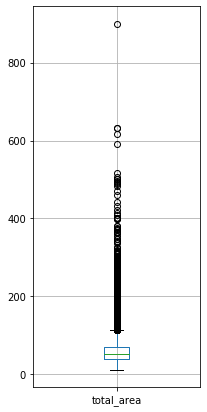

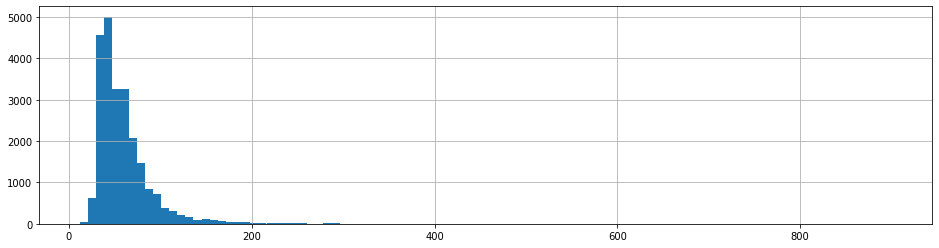

In [25]:
descr_numeric('total_area')

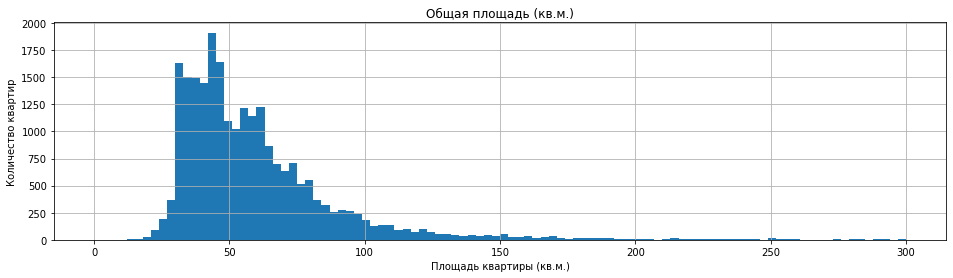

(-10, 150)

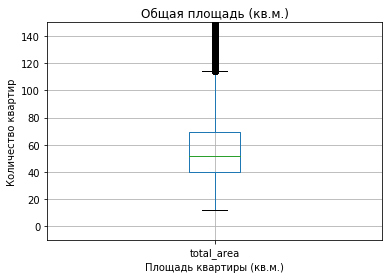

In [77]:
ax = data.total_area.hist(figsize=(16,4), range=(0,300), bins=100);
ax.set_title('Общая площадь (кв.м.)')
ax.set_xlabel('Площадь квартиры (кв.м.)')
ax.set_ylabel('Количество квартир')
plt.show()
bx = data.boxplot('total_area') 
bx.set_title('Общая площадь (кв.м.)')
bx.set_xlabel('Площадь квартиры (кв.м.)')
bx.set_ylabel('Количество квартир')
plt.ylim(-10, 150)

<div style="border:solid green 5px; padding: 20px">
    По гистограмме мы видим, что самые популярные квартиры площадью от 30 до 45 метров. Также выделяются квартиры 55-80 метров. Видно, что чем больше площадь квартиры, тем они реже продаются. 

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
5     2890000.0
6     3700000.0
Name: last_price, dtype: float64 count    2.365800e+04
mean     6.541159e+06
std      1.089461e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


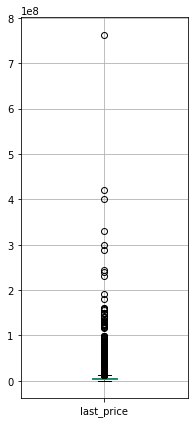

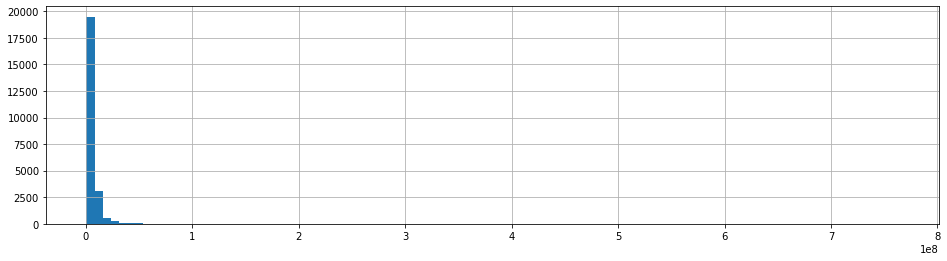

In [27]:
descr_numeric('last_price')

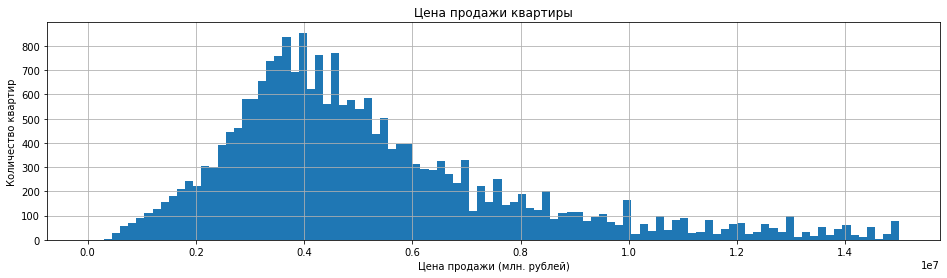

In [81]:
cx = data.last_price.hist(figsize=(16,4), range=(0,15000000), bins=100);
cx.set_title('Цена продажи квартиры')
cx.set_xlabel('Цена продажи (млн. рублей)')
cx.set_ylabel('Количество квартир');


<div style="border:solid green 5px; padding: 20px">
    Тут видно, что в основном квартиры продаются от 300 до 500 тысяч рублей.

0    3
1    1
2    2
3    3
4    2
5    1
6    1
Name: rooms, dtype: int64 count    23658.000000
mean         2.070082
std          1.078556
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


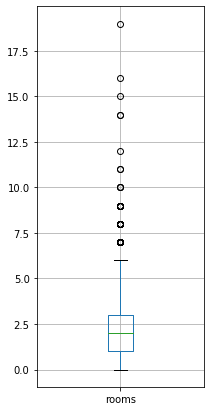

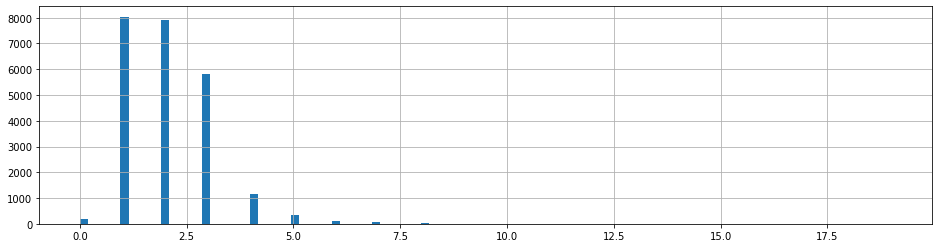

In [29]:
descr_numeric('rooms')

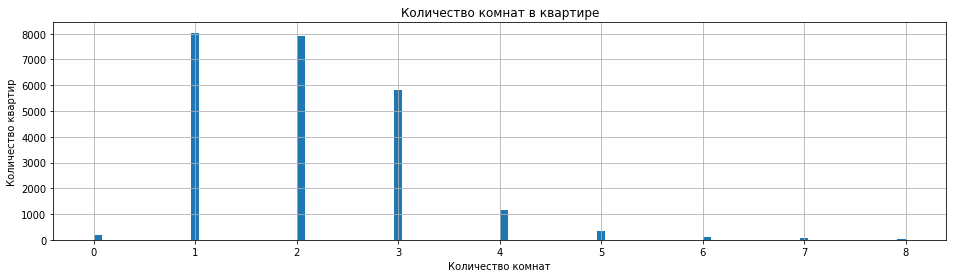

In [84]:
dx = data.rooms.hist( figsize=(16,4), range=(0,8), bins=100);
dx.set_title('Количество комнат в квартире')
dx.set_xlabel('Количество комнат')
dx.set_ylabel('Количество квартир');

<div style="border:solid green 5px; padding: 20px">
    В основном продаются квартиры одной, двумя и тремя комнатами.

0    2.699219
1    2.699219
2    2.699219
3    9.101562
4    3.029297
5    2.699219
6    2.699219
Name: ceiling_height, dtype: float16 count    2.365800e+04
mean              inf
std      1.746094e+00
min      0.000000e+00
25%      2.599609e+00
50%      2.699219e+00
75%      2.750000e+00
max      1.000000e+02
Name: ceiling_height, dtype: float64


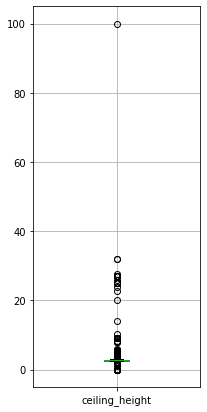

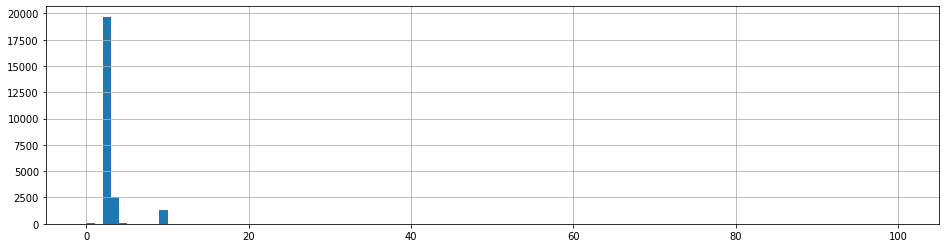

In [31]:
descr_numeric('ceiling_height')

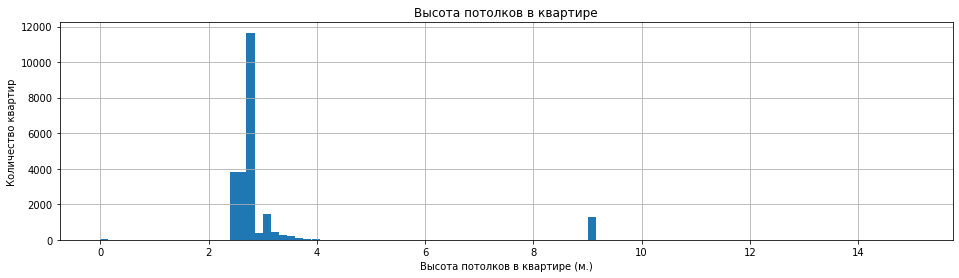

In [85]:
ex = data.ceiling_height.hist( figsize=(16,4), range=(0,15), bins=100);
ex .set_title('Высота потолков в квартире')
ex .set_xlabel('Высота потолков в квартире (м.)')
ex .set_ylabel('Количество квартир');

<div style="border:solid green 5px; padding: 20px">
    Высота потолков от 2,5 до 3 метров. Все что выше 4 метров можно считать выбросами.

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
Name: days_exposition, dtype: float16 count    20681.0
mean         inf
std          inf
min          0.0
25%         44.0
50%         93.0
75%        229.0
max       1580.0
Name: days_exposition, dtype: float64


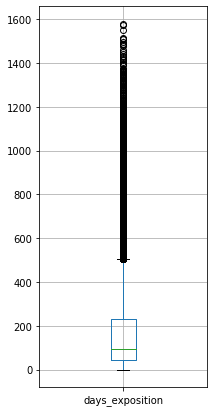

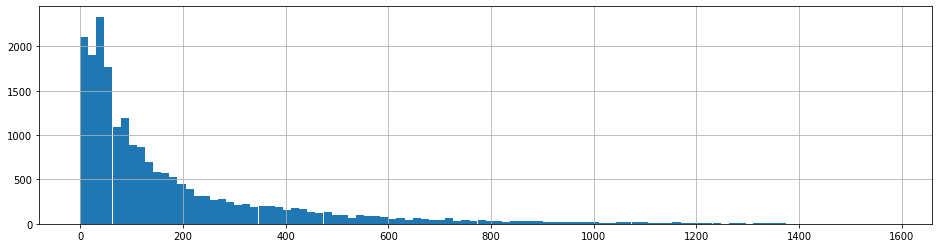

In [33]:
descr_numeric('days_exposition')

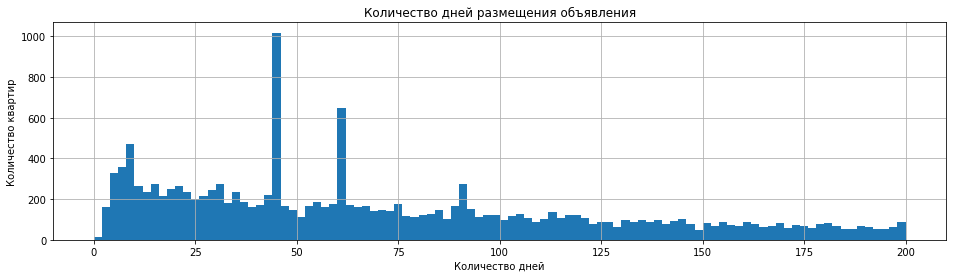

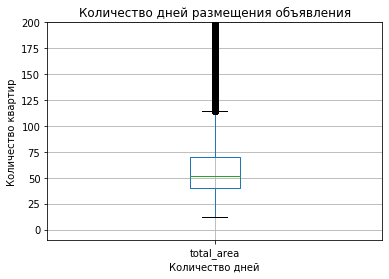

In [86]:
#Рассмотрим гистограмму до 200 дня (1,5 межквартильного размаха от Q3)
fx = data.days_exposition.hist(figsize=(16,4), range=(0,200), bins=100);
fx .set_title('Количество дней размещения объявления')
fx .set_xlabel('Количество дней')
fx .set_ylabel('Количество квартир');
plt.show()
gx = data.boxplot(column='total_area') 
plt.ylim(-10, 200)
gx .set_title('Количество дней размещения объявления')
gx .set_xlabel('Количество дней')
gx .set_ylabel('Количество квартир');

<div style="border:solid green 5px; padding: 20px">
    Квартиры в среднем продаются 168 дней, однако медианное значение 93 дня. Разница практически в 2 раза - это говорит о большом количестве выбросов. Нормальными считаются продажи в периоде от 15 до 125 дней. Все что ниже и выше данного интервала можно считать очень быстрой и очень долгой продажей соответственно. Также можем увидеть что продажи на 45, 60  день происдят чаще других.

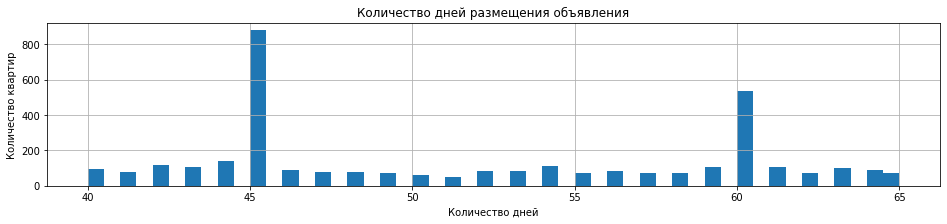

In [87]:
hx = data['days_exposition'].hist(bins=50, range=(40,65),figsize=(16,3));
hx .set_title('Количество дней размещения объявления')
hx .set_xlabel('Количество дней')
hx .set_ylabel('Количество квартир');

<div style="border:solid green 5px; padding: 20px">
    
**Убирем редкие и выбивающиеся значения.**
<br> Создадим новую таблицу new_data со следующим параметрами: total_area <=120 , last_price <= 15000000, rooms <= 4, ceiling_height <= 4, days_exposition <=125. Также уберем лишние столбцы, для упрощения анализа.

In [36]:
new_data=data.query('total_area <= 120 and last_price <= 15000000 and rooms <= 4 and ceiling_height <= 4 and days_exposition <=125')
new_data = new_data.drop(columns=['total_images', 'is_apartment', 'studio', 'open_plan', 'parks_around3000', 'ponds_around3000', 'open_plan', ])
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,10707.0,4.889702e+06,2.377689e+06,450000.000000,3.350000e+06,4.350000e+06,5.900000e+06,1.500000e+07
total_area,10707.0,inf,1.787500e+01,13.000000,3.800000e+01,4.718750e+01,6.200000e+01,1.200000e+02
rooms,10707.0,1.856636e+00,8.590643e-01,0.000000,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
ceiling_height,10707.0,2.671875e+00,2.575684e-01,0.000000,2.599609e+00,2.699219e+00,2.699219e+00,4.000000e+00
floors_total,10692.0,inf,6.628906e+00,0.000000,5.000000e+00,9.000000e+00,1.600000e+01,5.200000e+01
living_area,10707.0,inf,1.214062e+01,2.000000,1.800000e+01,2.900000e+01,3.618750e+01,1.000000e+02
floor,10707.0,6.143364e+00,4.953859e+00,1.000000,3.000000e+00,5.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,10707.0,inf,4.039062e+00,-17.000000,7.000000e+00,9.000000e+00,1.100000e+01,6.400000e+01
balcony,10707.0,1.023438e+00,1.931641e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,9.101562e+00
airports_nearest,8512.0,2.835925e+01,1.330985e+01,0.000000,1.704900e+01,2.690750e+01,3.762500e+01,8.375800e+01


<div style="border:solid green 5px; padding: 20px">
Здорово! По всем столбцам среднее и медиана практически равны. Значит мы правильно сделали срез данных. Теперь приступим к изучению факторов которые влияют на стоимость квартиры.
   

In [37]:
new_data['last_price'].corr(new_data['total_area']) # Узнаем зависимость стоимости квартиры от площади

0.7357798493511016

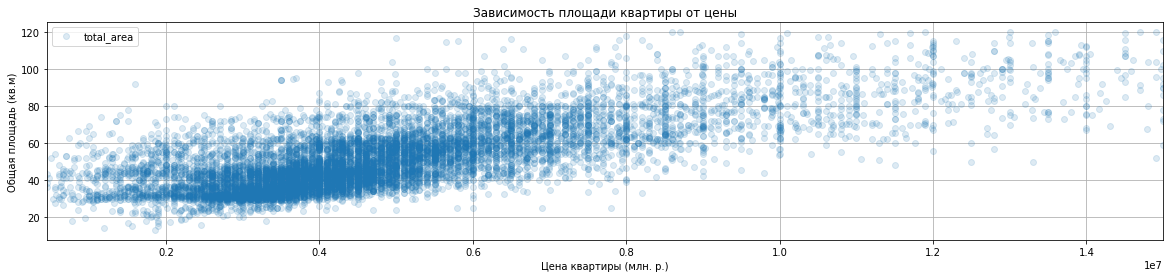

In [88]:
jx = (new_data
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o',figsize=(20,4), alpha=0.15)
)
jx .set_title('Зависимость площади квартиры от цены')
jx .set_xlabel('Цена квартиры (млн. р.)')
jx .set_ylabel('Общая площадь (кв.м)');

<div style="border:solid green 5px; padding: 20px">
Коэффициент корреляции 0,73 означает сильную положительную зависимость. При увеличении площади - увеличивается стоимость.

In [39]:
new_data['last_price'].corr(new_data['rooms']) # Узнаем зависимость стоимости квартиры от числа комнат

0.46139658076972906

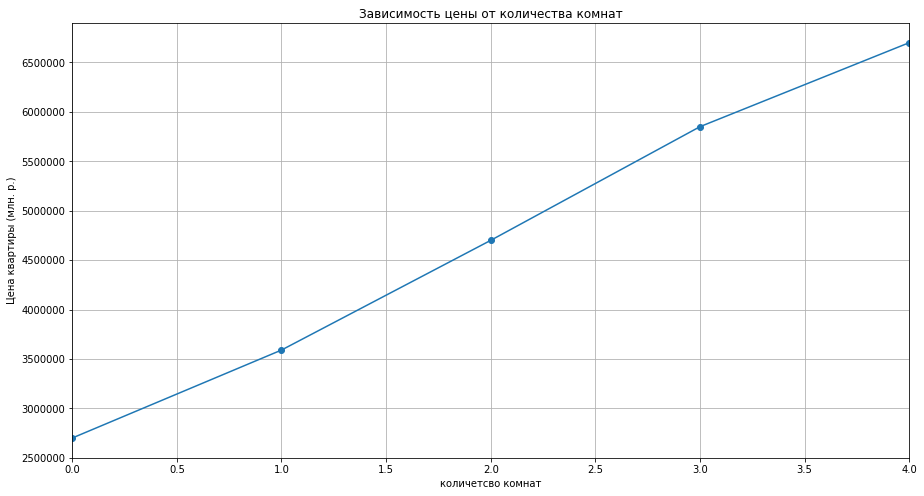

In [89]:
kx = (new_data
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)
kx .set_title('Зависимость цены от количества комнат')
kx .set_xlabel('количетсво комнат')
kx .set_ylabel('Цена квартиры (млн. р.)');

<div style="border:solid green 5px; padding: 20px">
Коэффициент корреляции 0,45 означает положительную зависимость. При увеличенииколичества комнат - увеличивается стоимость.

In [42]:
new_data['last_price'].corr(new_data['city_centers_nearest']) # Узнаем зависимость стоимости квартиры от удаленности от центра

-0.29308169930505173

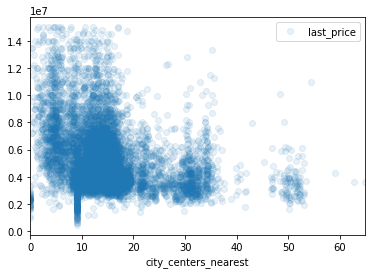

In [43]:
(
    new_data
    .sort_values(by='city_centers_nearest',ascending=True)
    .plot(x='city_centers_nearest',y='last_price',style='o',alpha=0.1)
#    .plot(x='city_centers_nearest', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
)

<div style="border:solid green 5px; padding: 20px">
Коэффициент корреляции -0,29 означает минимальную отрицательную зависимость. При уменьшении расстояния до центра - увеличивается стоимость, но не сильно.

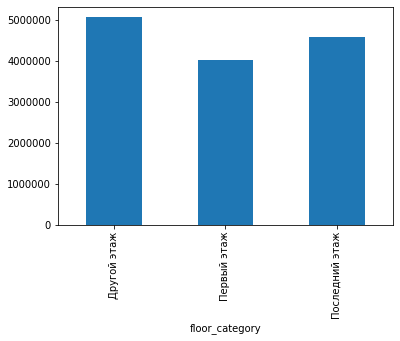

In [44]:
(
new_data.groupby('floor_category')['last_price'].mean()
    .plot(x='floor_category',y='last_price',kind='bar')
)
# Посмотрим как меняется стоимость квартиры от этаже где она находится

<div style="border:solid green 5px; padding: 20px">
На первом этаже располагаются самые дешевые квартиры. На последнем этаже квартиры тоже не так сильно любят.

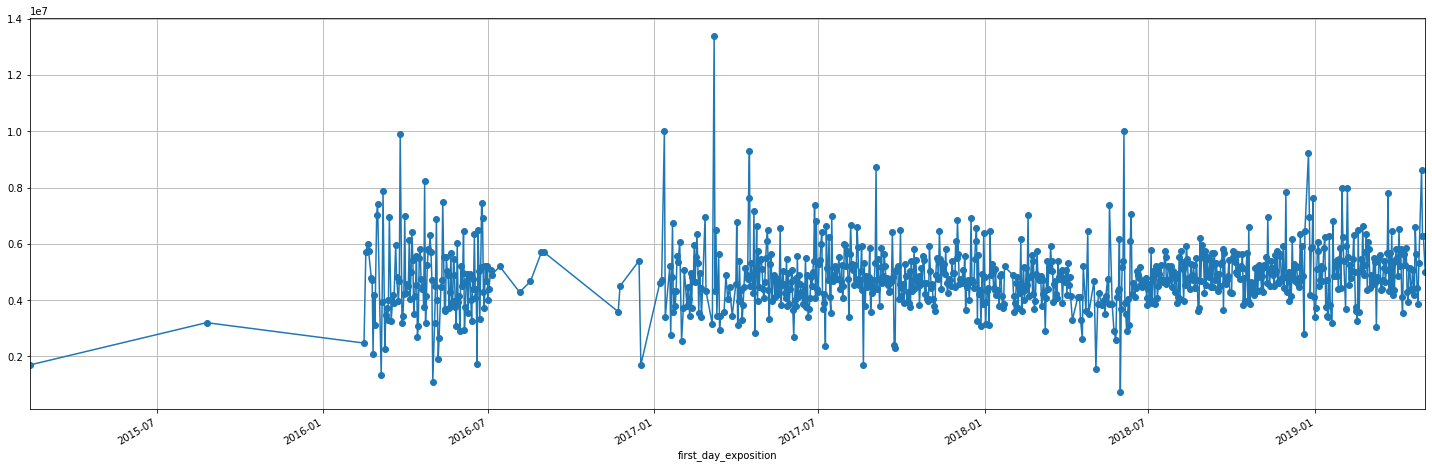

In [45]:
(
new_data.groupby('first_day_exposition')['last_price'].mean()
    .plot(x='first_day_exposition',y='last_price',style='o-',grid=True,figsize=(25,8),alpha=1)
);
# Посмотрим как меняется стоимость квартиры от этаже где она находится

<div style="border:solid green 5px; padding: 20px">
Можно увидеть, что в начале 2015 года медианная цена стоимости квартиры была очень неопределенной. Это может быть связанно с большим количеством дешевых квартир в одно время и большим количеством дорогих квартир в другое время. После 2017 года цена нормальзовалась.

In [46]:
new_data['week_day']=new_data['first_day_exposition'].dt.weekday #создадим столбец с днем недели
new_data['month']=new_data['first_day_exposition'].dt.month #создадим столбец с месяцем
new_data['year']=new_data['first_day_exposition'].dt.year #создадим столбец с годом
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10707 entries, 1 to 23654
Data columns (total 24 columns):
last_price              10707 non-null float64
total_area              10707 non-null float16
first_day_exposition    10707 non-null datetime64[ns]
rooms                   10707 non-null int64
ceiling_height          10707 non-null float16
floors_total            10692 non-null float16
living_area             10707 non-null float16
floor                   10707 non-null int64
kitchen_area            10707 non-null float16
balcony                 10707 non-null float16
locality_name           10707 non-null object
airports_nearest        8512 non-null float64
city_centers_nearest    8520 non-null float64
parks_nearest           3881 non-null float16
ponds_nearest           4332 non-null float16
days_exposition         10707 non-null float16
dif                     10707 non-null float16
price_m2                10707 non-null int64
floor_category          10707 non-null object
rat

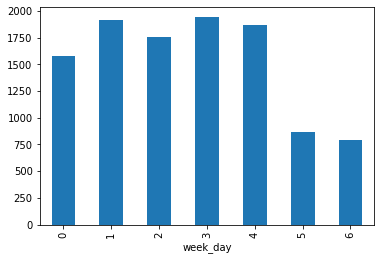

In [47]:
(
new_data.groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

<div style="border:solid green 5px; padding: 20px">
Чаще всего оъявления о продаже квартир выкладывают во вторник, чертверг и пятницу. В выходные все хотят отдыхать))

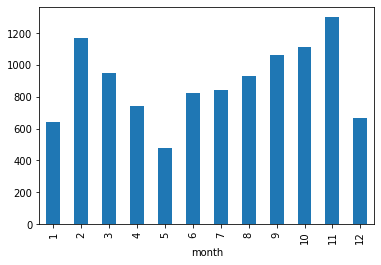

In [48]:
(
new_data.groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

<div style="border:solid green 5px; padding: 20px">
Большая часть оъявлений о продаже квартир приходится на февраль, март, апрель, ноябрь. Меньше всего объявление в январе, мае и декабре.

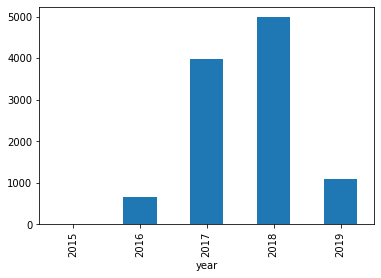

In [49]:
(
new_data.groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

<div style="border:solid green 5px; padding: 20px">
Можно увидеть, что с каждым годом все больше объявлений о продаже квартир. В 2019 был спад, возможно в связи с пандемией.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> замечательно!

In [50]:
#Найдем топ10 населенных пунктов с наибольшим числов объявлений. Узнаем их среднюю цену за квадратный метр и выведем на экран.
top10 = new_data.groupby('locality_name')['price_m2'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top10.columns = ['flats', 'sq_metr_price']
top10.reset_index(inplace=True)
print(top10)
print(top10[top10['sq_metr_price']==top10['sq_metr_price'].min()])#Населенный пункт с минимальной стоимостью жилья за квадратный метр
print(top10[top10['sq_metr_price']==top10['sq_metr_price'].max()])#Населенный пункт с максимальной стоимостью жилья за квадратный метр

       locality_name  flats  sq_metr_price
0    Санкт-Петербург   7147  106286.055128
1     посёлок Мурино    294   87518.136054
2     посёлок Шушары    225   78845.955556
3            Колпино    199   74707.336683
4  посёлок Парголово    169   90081.668639
5         Всеволожск    158   66981.037975
6    деревня Кудрово    146   92997.808219
7            Гатчина    145   70115.772414
8             Пушкин    135  100082.555556
9           Петергоф     99   85029.444444
  locality_name  flats  sq_metr_price
5    Всеволожск    158   66981.037975
     locality_name  flats  sq_metr_price
0  Санкт-Петербург   7147  106286.055128


<div style="border:solid green 5px; padding: 20px">
Больше всего объявлений  в Санкт-Петербурге (8713 объявлений) со средней ценой за квадратный метр - 108252 рубля. Замыкает топ 10 Кудрово с числом объявлений - 126, и средней ценой за квадратный метр - 101387 рублей. Самая низкая цена за квадратный метр в Всеволжске 67499 рублей (213 объявлений).

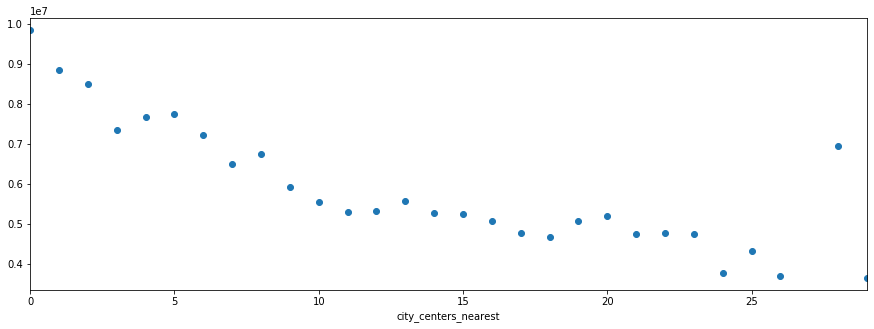

In [51]:
#Изучим предложения квартир в городе Санкт_Петербург
spb = new_data.loc[new_data['locality_name']=='Санкт-Петербург',['city_centers_nearest', 'price_m2', 'last_price']].reset_index(drop=True) 
spb['city_centers_nearest'] = round(spb['city_centers_nearest'])

# Построим график стоимости квартир в зависимости от удаленности от центра по средней итоговой цене 
spb.groupby('city_centers_nearest')['last_price'].mean().plot(x='city_centers_nearest',y='last_price', style='o',figsize=(15,5))

#spb.groupby('city_centers_nearest')['price_m2'].count()
#spb.pivot_table(index='city_centers_nearest',values=['price_m2','last_price'],aggfunc=['mean','count'])

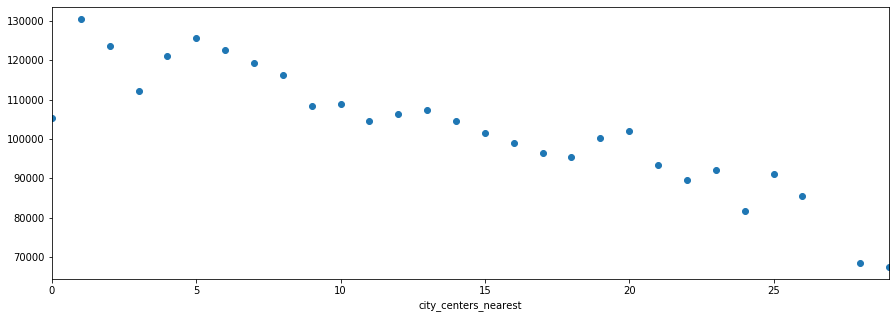

In [52]:
spb.groupby('city_centers_nearest')['price_m2'].mean().plot(x='city_centers_nearest',y='price_m2', style='o',figsize=(15,5))
#и по срдней цене за квадратный метр

<div style="border:solid green 5px; padding: 20px">
Рассмотрев оба графика можно заметить, что самые высокие точки - это первые 5 киллометров, затем уже идет снижение. Провал первой точки на графике где рассматриваем цену за квадратный метр можно объяснить тем, что мы убрали редкие и выбивающиеся значения по площади и стоимости. А это как раз были квартиры расположенные в самом центре.

In [53]:
#Проанализируем и сравним территорию в центре города и во всем городе целиком
#Выделим сегмент квартир в центре
new_data['city_centers_nearest'] = round(new_data['city_centers_nearest'])
spb_center = new_data.query('locality_name == "Санкт-Петербург" and city_centers_nearest <= 5').reset_index(drop=True) 
spb_center.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_nearest,ponds_nearest,days_exposition,dif,price_m2,floor_category,ratio_liv_area,ratio_kitchen_area,week_day,month,year
0,9600000.0,90.0000,2017-09-26,4,2.699219,5.0,67.000000,2,8.000000,0.0,Санкт-Петербург,23.277,3.0,NaN,NaN,104.0,15.0000,106666,Другой этаж,0.744629,0.088867,1,9,2017
1,4800000.0,40.0000,2017-11-18,2,2.699219,3.0,29.000000,2,6.000000,0.0,Санкт-Петербург,23.371,3.0,NaN,729.0,80.0,5.0000,120000,Другой этаж,0.725098,0.150024,5,11,2017
2,7050000.0,66.0000,2017-09-04,3,3.000000,4.0,37.812500,4,11.000000,0.0,Санкт-Петербург,26.235,5.0,NaN,1013.0,98.0,17.1875,106818,Последний этаж,0.572754,0.166626,0,9,2017
3,6283000.0,70.8125,2017-10-05,3,2.699219,5.0,50.906250,5,8.203125,0.0,Санкт-Петербург,25.335,4.0,NaN,NaN,61.0,11.6875,88727,Последний этаж,0.718750,0.115845,3,10,2017
4,5650000.0,46.3125,2017-03-13,2,2.699219,6.0,28.796875,2,9.000000,0.0,Санкт-Петербург,31.327,3.0,NaN,NaN,89.0,8.5000,121997,Другой этаж,0.621582,0.194336,0,3,2017


In [54]:
#Выделим квартиры во всем городе
spb_all = new_data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True) 
spb_center.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_nearest,ponds_nearest,days_exposition,dif,price_m2,floor_category,ratio_liv_area,ratio_kitchen_area,week_day,month,year
0,9600000.0,90.0000,2017-09-26,4,2.699219,5.0,67.000000,2,8.000000,0.0,Санкт-Петербург,23.277,3.0,NaN,NaN,104.0,15.0000,106666,Другой этаж,0.744629,0.088867,1,9,2017
1,4800000.0,40.0000,2017-11-18,2,2.699219,3.0,29.000000,2,6.000000,0.0,Санкт-Петербург,23.371,3.0,NaN,729.0,80.0,5.0000,120000,Другой этаж,0.725098,0.150024,5,11,2017
2,7050000.0,66.0000,2017-09-04,3,3.000000,4.0,37.812500,4,11.000000,0.0,Санкт-Петербург,26.235,5.0,NaN,1013.0,98.0,17.1875,106818,Последний этаж,0.572754,0.166626,0,9,2017
3,6283000.0,70.8125,2017-10-05,3,2.699219,5.0,50.906250,5,8.203125,0.0,Санкт-Петербург,25.335,4.0,NaN,NaN,61.0,11.6875,88727,Последний этаж,0.718750,0.115845,3,10,2017
4,5650000.0,46.3125,2017-03-13,2,2.699219,6.0,28.796875,2,9.000000,0.0,Санкт-Петербург,31.327,3.0,NaN,NaN,89.0,8.5000,121997,Другой этаж,0.621582,0.194336,0,3,2017


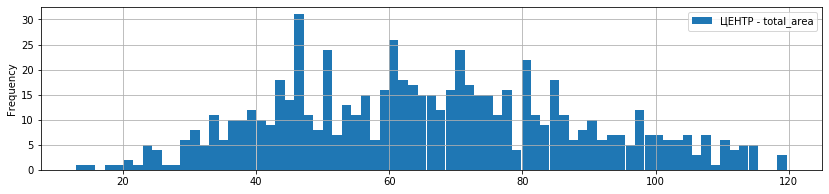

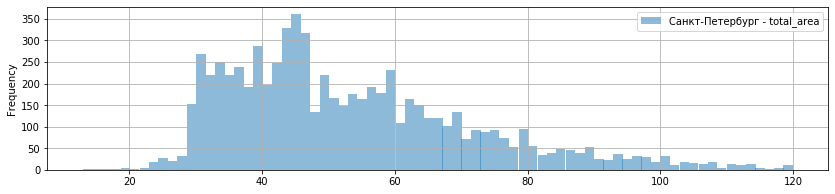

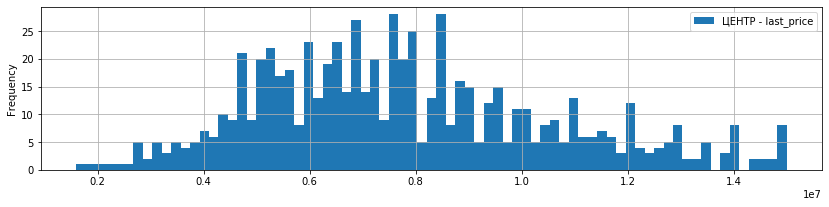

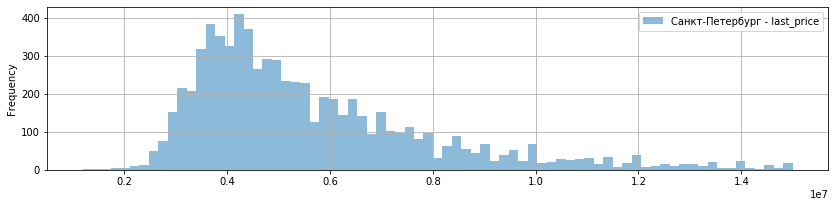

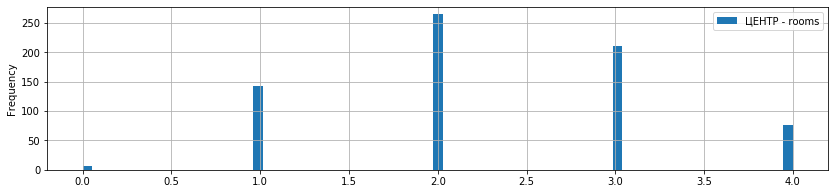

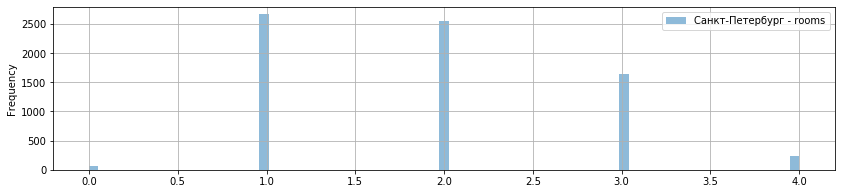

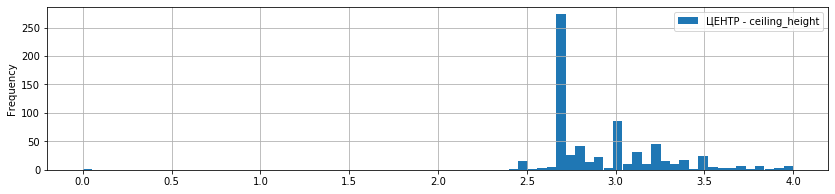

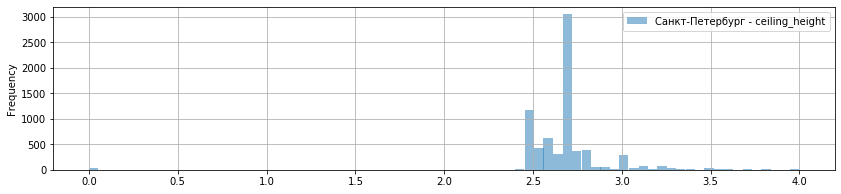

In [55]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=75, alpha=1, legend=True, label='ЦЕНТР - '+col);
    spb_all.plot(y=col, kind='hist', grid=True, figsize=(14,3), bins=75, alpha=0.5, legend=True, label='Санкт-Петербург - '+col);
    plt.show()

<div style="border:solid green 5px; padding: 20px">
Проанализировав гистограммы делаем следующие выводы:
<br>1. В центре преобладають квартиры 45-75 кв.м., в городе в основном 25-45 кв.м.
<br>2. Стоимость квартир в центре в основном 6-9 млн, в городе в основном 3-5 млн.
<br>3. Количество комнат в центре в основном 2-3 комнаты, в городе в основном 1-2 комнты.
<br>4. И высота потолков в центре чуть выше (около 3 м), в городе где-то 2,5-2,75 метра. (2,65 мы заполнили медианным значением)

Корелляция цены ЦЕНТР от rooms 0.44322720354196893


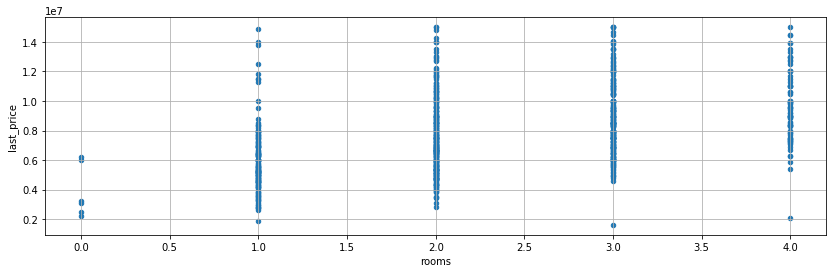

Корелляция цены Санкт-Петербург от rooms 0.5089698990500126


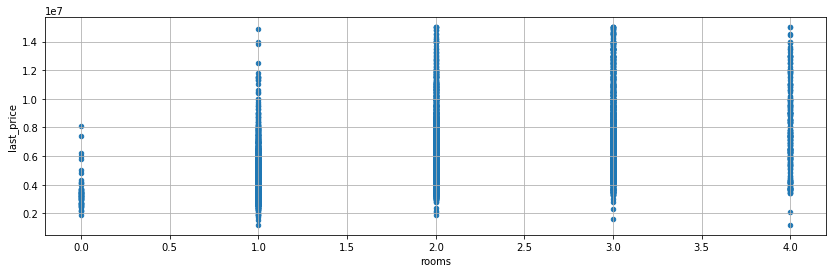

Корелляция цены ЦЕНТР от floor 0.24209505967688785


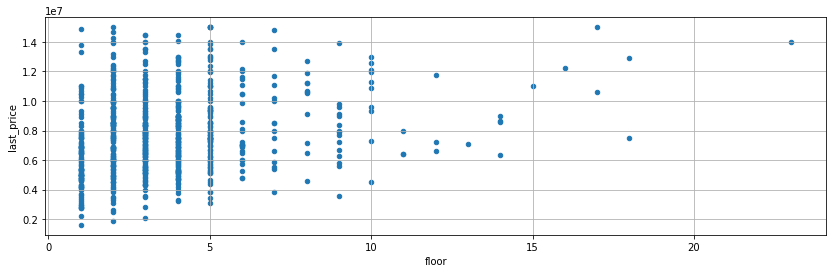

Корелляция цены Санкт-Петербург от floor 0.09684723644800293


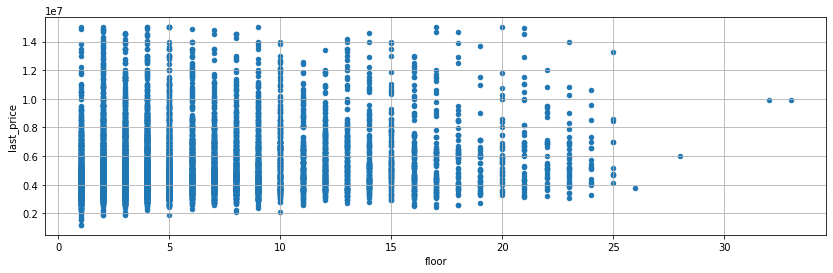

Корелляция цены ЦЕНТР от city_centers_nearest -0.09826788060790713


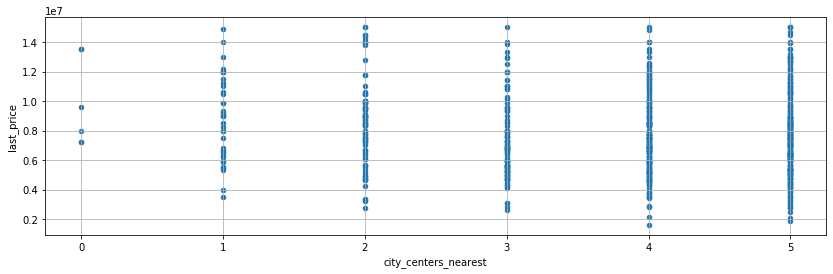

Корелляция цены Санкт-Петербург от city_centers_nearest -0.33962075445507833


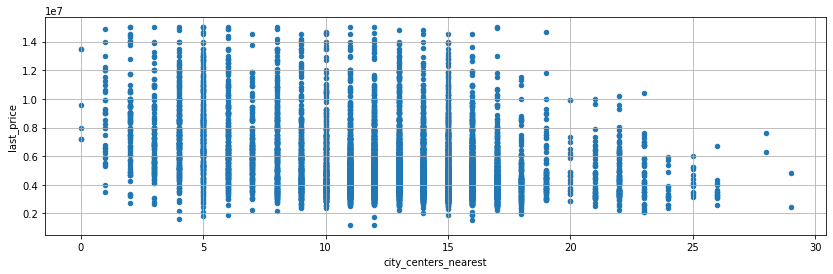

Корелляция цены ЦЕНТР от week_day 0.011147324584736181


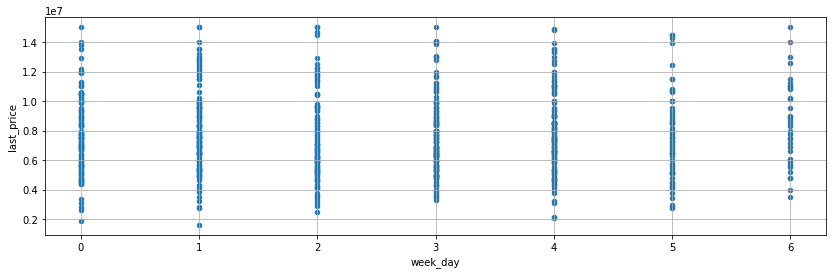

Корелляция цены Санкт-Петербург от week_day 0.012588913680021406


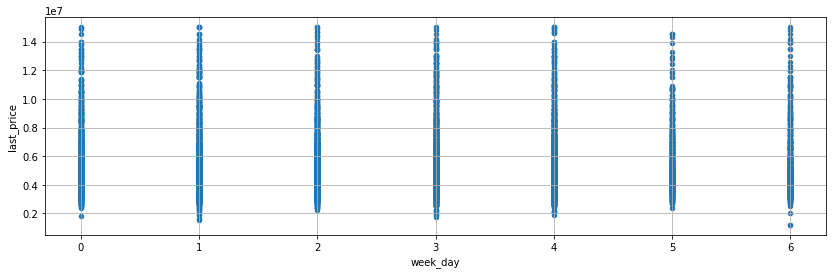

Корелляция цены ЦЕНТР от month -0.00947155812529319


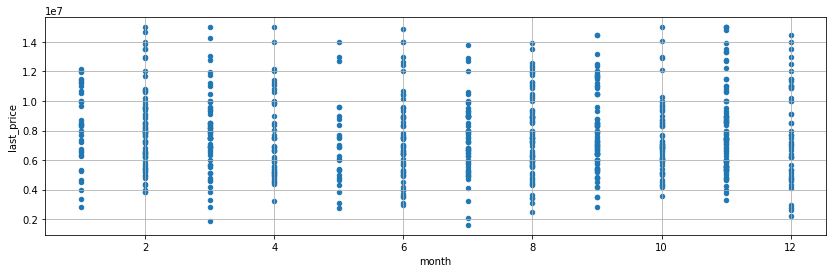

Корелляция цены Санкт-Петербург от month 0.020195305791556737


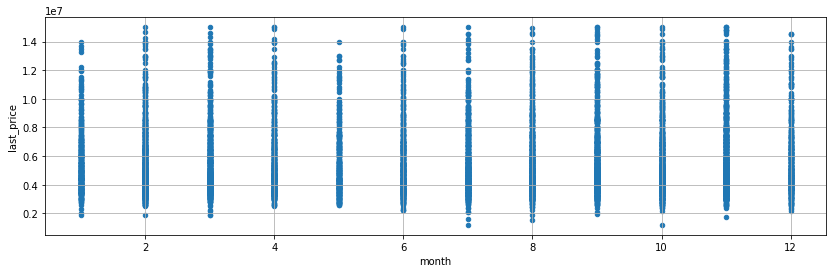

Корелляция цены ЦЕНТР от year 0.002668244199279175


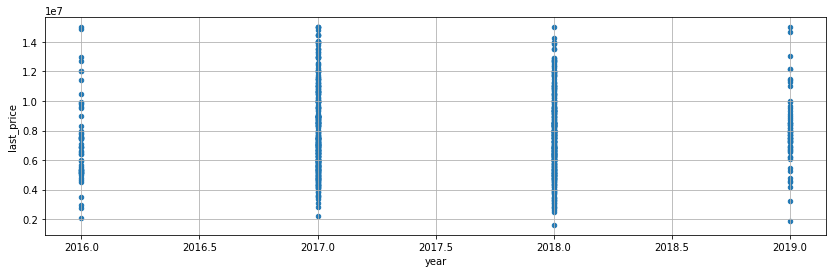

Корелляция цены Санкт-Петербург от year 0.03465047955580559


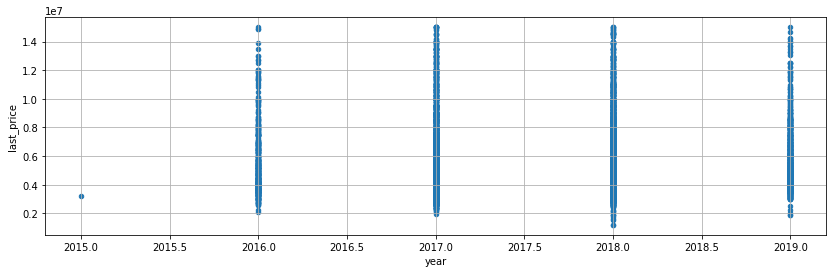

In [56]:
#Выделим факторы которые влияют на стоимость квартиры в центре.
def corr_spb(column):   
    plt.show()
    print('Корелляция цены ЦЕНТР от',column , spb_center['last_price'].corr(spb_center[column]))
    spb_center.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,4));
    plt.show()
    print('Корелляция цены Санкт-Петербург от',column , spb_all['last_price'].corr(spb_all[column]))
    spb_all.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,4));

for сol in ['rooms', 'floor', 'city_centers_nearest', 'week_day', 'month', 'year']:
    corr_spb(сol)


ЦЕНТР


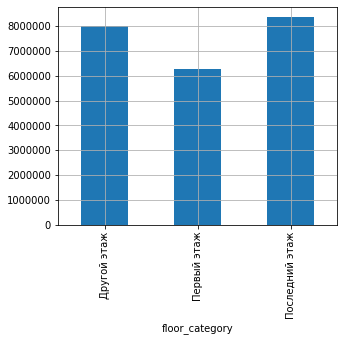

ПИТЕР


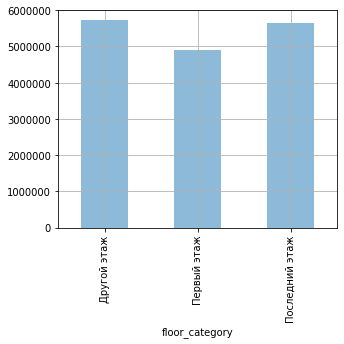

In [57]:

# Зависимости от Категории этажа (первый, последний другой)
# Вычислим среднюю цену в каждой категории
plt.show()
fl_spb_center = spb_center.groupby('floor_category')['last_price'].mean();
fl_spb_all = spb_all.groupby('floor_category')['last_price'].mean();
print('ЦЕНТР')
plt.show()
fl_spb_center.plot(x=new_data.index, y=new_data.values, kind='bar', grid=True, figsize=(5,4), alpha=1);
plt.show()
print('ПИТЕР')
fl_spb_all.plot(x=new_data.index, y=new_data.values, kind='bar', grid=True, figsize=(5,4), alpha=0.5);

<div style="border:solid green 5px; padding: 20px">
Проанализировав графики делаем следующие выводы:
<br>1. Количество комнат чуть слабее влияет на цену в Центре города
<br>2. Если в Городе есть слабая зависимость от расстояния от центра, то в Центре такой зависимости нет
<br>По остальным параметрам зависимости не прослеживаются
<br>Есть еще особенность - что в Центре, что и в самом Городе продается больше квартир на последних этажах, по сравнению со всеми квартирами в data


## Общий вывод

<div style="border:solid green 5px; padding: 20px">
    
**<font color="green">Общий анализ данных датасета</font>**
<br>Самые популярные квартиры площадью от 30 до 45 метров (1-2 комнаиные). Также выделяются квартиры 55-80 метров (2-3 комнатные). Видно, что чем больше площадь квартиры, тем они реже продаются. Цена продажи от 300 до 500 тысяч рублей. Высота потолков от 2,5 до 3 метров. Квартириры в среднем продаются 93 дня. Нормальными считаются продажи в периоде от 15 до 125 дней, все что ниже и выше данного интервала можно считать очень быстрой и очень долгой продажей соответственно.

**<font color="green">Анализ данных после очищения датасета от редких и выбивающихся значений</font>**   
<br>Имеется сильная положительная зависимость стоимости квартиры от общей площади (коэффициент корреляции - 0,73). На первом этаже располагаются самые дешевые квартиры, на последнем этаже квартиры тоже не так сильно любят.      
<br>Можно увидеть, что в начале 2015 года медианная цена стоимости квартиры была очень неопределенной. Это может быть связанно с большим количеством дешевых квартир в одно время и большим количеством дорогих квартир в другое время. После 2017 года цена нормальзовалась.
<br>Чаще всего оъявления о продаже квартир выкладывают во вторник, чертверг и пятницу, реже всего в выходные.
<br>Большая часть оъявлений о продаже квартир приходится на февраль, март, апрель, ноябрь. Меньше всего объявление в январе, мае и декабре.
<br>Можно увидеть, что с каждым годом все больше объявлений о продаже квартир. В 2019 был спад, возможно в связи с пандемией.
    
**<font color="green">Анализ топ10 населенных пунктов по количеству объявлений</font>**   
<br>Больше всего объявлений  в Санкт-Петербурге (8713 объявлений) со средней ценой за квадратный метр - 108252 рубля. Замыкает топ 10 Кудрово с числом объявлений - 126, и средней ценой за квадратный метр - 101387 рублей. Самая низкая цена за квадратный метр в Всеволжске 67499 рублей (213 объявлений).
 
**<font color="green">Анализ города Санкт-Петербург</font>**          
<br>Центром города считать окружность в 5 км от центрально точки города.
<br>1. В центре преобладают квартиры 45-75 кв.м., в городе в основном 25-45 кв.м.
<br>2. Стоимость квартир в центре в основном 6-9 млн, в городе в основном 3-5 млн.
<br>3. Количество комнат в центре в основном 2-3 комнаты, в городе в основном 1-2 комнты.
<br>4. Высота потолков в центре чуть выше (около 3 м), в городе где-то 2,5-2,75 метра. (2,65 мы заполнили медианным значением).
<br>5. Количество комнат чуть слабее влияет на цену в Центре города.
<br>6. Если в Городе есть слабая зависимость от расстояния от центра, то в Центре такой зависимости нет.
<br>По остальным параметрам зависимости не прослеживаются.
<br>Есть еще особенность - что в Центре, что и в самом Городе продается больше квартир на последних этажах, по сравнению со всеми квартирами в датасете.